In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import statistics
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
data= pd.read_excel(r'C:\Users\usuario\Downloads\regresionpendulo\datosregresionmecanica.xlsx',sep=" ", header=None)
data.rename(columns={0:"t",1:"x",2:"y"}, inplace=True)

data


,t,x
0,0.067,459.700
1,0.100,332.700
2,0.133,42.340
3,0.167,-248.000
4,0.200,-205.700
...,...,...
118,4.000,6.049
119,4.033,30.240
120,4.067,12.100
121,4.100,0.000


In [4]:
x=[]
t=[]
for i in data.x:
    x.append(i)
for i in data.t:
    t.append(i)

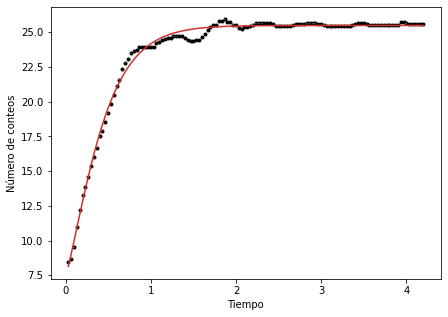

Text(0, 0.5, 'Residuos normalizados')

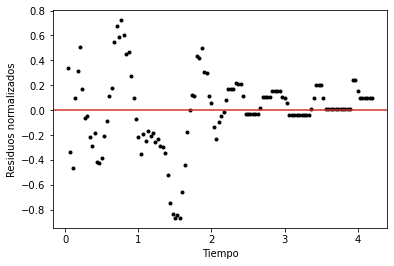

In [57]:
bins = 20
x=np.array(x)
t=np.array(t)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
sig = np.full_like(x,0.01)
#print(sig)
D, pcov = scipy.optimize.curve_fit(lambda t,A,gamma,omega,D,E: A*np.exp(-gamma*t)*np.sin(omega*t+D)+E, t, x, sigma=sig, maxfev=100000)
err = sig

def Y(t,A,gamma,omega,D,E): 
    return A*np.exp(-gamma*t)*np.sin(omega*t+D)+E

xf = t
yf = Y(xf, D[0], D[1],D[2],D[3],D[4])
plt.scatter(t,x,color='black',marker='.')
plt.plot(xf, yf, color='#D0312D')
plt.xlabel("Tiempo")
plt.ylabel("Número de conteos")

##barras de error
plt.errorbar(t, x, yerr=0.01, linestyle= '', color='#5A5A5A')
plt.show()

#residuales
r = (x - Y(t,D[0],D[1],D[2],D[3],D[4]))#/(sig)
f = plt.figure()
#f.set_figwidth(7)
#f.set_figheight(3)
plt.scatter(t,r, color='black',marker='.')
plt.axhline(y = 0, color = '#D0312D', linestyle = '-')
r_std = np.std(r)
#plt.errorbar(r, t, yerr=r_std, linestyle= '')
plt.xlabel("Tiempo")
plt.ylabel("Residuos normalizados")


[0.00333894 0.13841875 0.46137645 0.1111214 ]
[0.         0.03414634 0.06829268 0.10243902 0.13658537 0.17073171
 0.20487805 0.23902439 0.27317073 0.30731707 0.34146341 0.37560976
 0.4097561  0.44390244 0.47804878 0.51219512 0.54634146 0.5804878
 0.61463415 0.64878049 0.68292683 0.71707317 0.75121951 0.78536585
 0.8195122  0.85365854 0.88780488 0.92195122 0.95609756 0.9902439
 1.02439024 1.05853659 1.09268293 1.12682927 1.16097561 1.19512195
 1.22926829 1.26341463 1.29756098 1.33170732 1.36585366 1.4
 1.43414634 1.46829268 1.50243902 1.53658537 1.57073171 1.60487805
 1.63902439 1.67317073 1.70731707 1.74146341 1.77560976 1.8097561
 1.84390244 1.87804878 1.91219512 1.94634146 1.9804878  2.01463415
 2.04878049 2.08292683 2.11707317 2.15121951 2.18536585 2.2195122
 2.25365854 2.28780488 2.32195122 2.35609756 2.3902439  2.42439024
 2.45853659 2.49268293 2.52682927 2.56097561 2.59512195 2.62926829
 2.66341463 2.69756098 2.73170732 2.76585366 2.8        2.83414634
 2.86829268 2.90243902 2.93

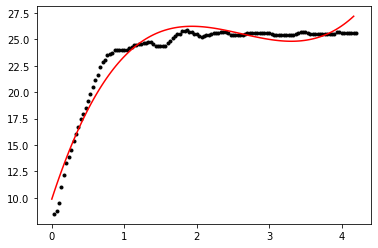

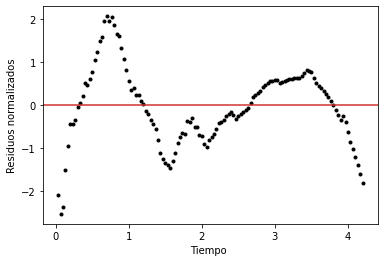

In [58]:
x = np.array(x)
t = np.array(t)
reg, cov = np.polyfit(t,x,3,cov=True)
error = np.diag(cov)
print(error)
def f(x):
    return (1.0971317)*np.power(x,3) - 8.62144062*np.power(x,2) + 21.03328282*x + 9.87214319
points = np.arange(0,4.2,4.2/123)
print(points)
xpoints = f(points)
plt.plot(points,xpoints, color='red')
plt.scatter(t,x,color='black',marker='.')
r = (x - f(t))#/(sig)
f = plt.figure()
#f.set_figwidth(7)
#f.set_figheight(3)
plt.scatter(t,r,color='black',marker='.')
plt.axhline(y = 0, color = '#D0312D', linestyle = '-')
r_std = np.std(r)
#plt.errorbar(t, r, yerr=r_std, linestyle= '')
plt.xlabel("Tiempo ")
plt.ylabel("Residuos normalizados")

# Correlacion entre residuales
print(stats.pearsonr(r, t))

Hay mas correlaciòn estadistica, pero menos sentido fisico

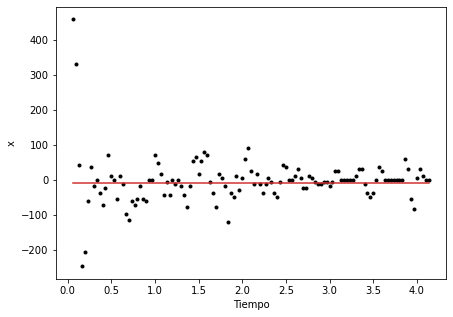

(0.009845310568915439, 0.9139342051939289)


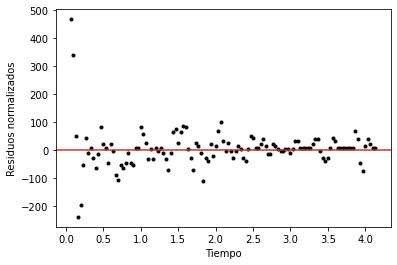

In [11]:
x=np.array(x)
t=np.array(t)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
sig = np.full_like(x,0.01)
#print(sig)
D, pcov = scipy.optimize.curve_fit(lambda t,N,a,b: N*np.exp(-a*t)+b, t, x, sigma=sig, maxfev=1000000)
err = sig

def Y(t,a,N,b): 
    return(N*np.exp(-a*t)+b)

xf = t
yf = Y(xf, D[0], D[1],D[2])
plt.scatter(t,x,color='black',marker='.')
plt.plot(xf, yf, color='#D0312D')
plt.xlabel("Tiempo")
plt.ylabel("x")

##barras de error
plt.errorbar(t, x, yerr=0.01, linestyle= '', color='#5A5A5A')
plt.show()

#residuales
r = (x - Y(t,D[0],D[1],D[2]))#/(sig)
f = plt.figure()
#f.set_figwidth(7)
#f.set_figheight(3)
plt.scatter(t,r,color='black',marker='.')
plt.axhline(y = 0, color = '#D0312D', linestyle = '-')
r_std = np.std(r)
#plt.errorbar(r, t, yerr=r_std, linestyle= '')
plt.xlabel("Tiempo")
plt.ylabel("Residuos normalizados")

# Correlacion entre residuales
print(stats.pearsonr(r, t))

In [ ]:
Mas sentido fisico pero menos correlaciòn. Se espera que el movimiento final sel pendulo sea un oscilador harmonico amortiguado.

In [40]:
data2= pd.read_excel(r'C:\Users\usuario\Downloads\regresionpendulo\datosmecanica2.xlsx',sep=" ", header=None)
data2.rename(columns={0:"t",1:"x",2:"y"}, inplace=True)
x2=[]
t2=[]
for i in data2.x:
    x2.append(i)
for i in data2.t:
    t2.append(i)
data2

,t,x,y
0,0.033,8.468,17.78
1,0.067,8.704,17.88
2,0.100,9.503,18.11
3,0.133,11.010,17.83
4,0.167,12.190,17.78
5,0.200,13.310,17.88
6,0.233,13.880,17.69
7,0.267,14.540,17.69
8,0.300,15.380,17.83
9,0.333,16.000,17.83


[-16.07473926  33.50198876   6.79669263] [0.47062069 0.56873056 0.03044233]
(-9.556419738876443e-09, 0.9999999592909348)


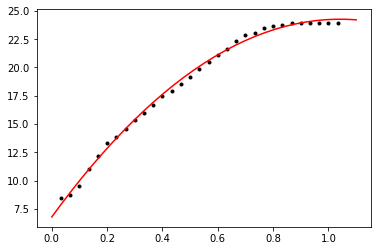

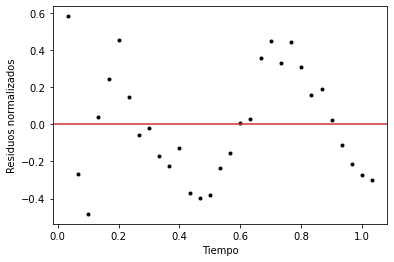

In [45]:
x2 = np.array(x2)
t2 = np.array(t2)
reg, cov = np.polyfit(t2,x2,2,cov=True)
error = np.diag(cov)
print(reg,error)

def f(x):
    return -16.07473926*np.power(x,2) +  33.50198876*np.power(x,1) + 6.79669263*np.power(x,0)

points = np.arange(0, 1.1, 1.1/30)
xpoints = f(points)
plt.plot(points, xpoints, color='red')
plt.scatter(t2, x2,color='black', marker='.')
r = (x2 - f(t2))#/(sig)
f = plt.figure()
#f.set_figwidth(7)
#f.set_figheight(3)
plt.scatter(t2,r,color='black', marker='.')
plt.axhline(y = 0, color = '#D0312D', linestyle = '-')
r_std = np.std(r)
#plt.errorbar(t, r, yerr=r_std, linestyle= '')
plt.xlabel("Tiempo")
plt.ylabel("Residuos normalizados")

# Correlacion entre residuales
print(stats.pearsonr(r, t2))

In [149]:
data3= pd.read_excel(r'C:\Users\usuario\Downloads\regresionpendulo\datosregresionmecanica.xlsx',sep=" ", header=None)
data3.rename(columns={0:"t",1:"x",2:"y"}, inplace=True)
x3=[]
t3=[]
n=0
m = 0
for i in data3.x:
    x3.append(i)
for i in data3.t:
    t3.append(i)
data3

,t,x,y
0,1.033,23.95,18.02
1,1.067,24.23,18.02
2,1.100,24.28,18.02
3,1.133,24.46,18.02
4,1.167,24.51,18.02
...,...,...,...
89,4.000,25.64,18.11
90,4.033,25.59,18.11
91,4.067,25.59,18.11
92,4.100,25.59,18.11


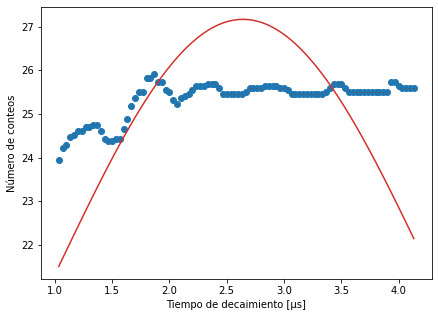

ValueError: x and y must have the same length.

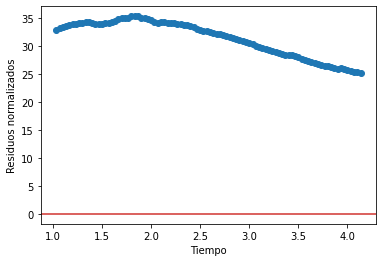

In [155]:
x3=np.array(x3)
t3 = np.array(t3)

f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
sig = np.full_like(x,0.01)
#print(sig)
D, pcov = scipy.optimize.curve_fit(lambda t,N,a,b: N*np.sin(t+a)+b, t, x, sigma=sig, maxfev=100000)
err = sig

def M(t,N,a,b): 
    return(N*np.sin(t+a)+b)

xf3 = t3
yf3 = M(xf3, D[0], D[1],D[2])
plt.scatter(t3,x3)
plt.plot(xf3, yf3, color='#D0312D')
plt.xlabel("Tiempo de decaimiento [µs]")
plt.ylabel("Número de conteos")

##barras de error
plt.errorbar(t3, x3, yerr=0.01, linestyle= '', color='#5A5A5A')
plt.show()

#residuales
r = (x3 - Y(t3,D[0],D[1]))#/(sig)
f = plt.figure()
#f.set_figwidth(7)
#f.set_figheight(3)
plt.scatter(t3,r)
plt.axhline(y = 0, color = '#D0312D', linestyle = '-')
r_std = np.std(r)
#plt.errorbar(r, t, yerr=r_std, linestyle= '')
plt.xlabel("Tiempo")
plt.ylabel("Residuos normalizados")

# Correlacion entre residuales
print(stats.pearsonr(r, t))

In [21]:
m = 1.883531627e-28
e = 1.602177e-19*1e9

In [22]:
def Gf(tau, mass):
    c = 299792458
    h = 1.05457182e-34
    return np.sqrt((192*(np.pi**3)*(h**7))/(tau*(mass**5)*(c**4)))

In [195]:
G1=Gf(tau1*(1e-6), m)
G1/e

9.157360209578802e-53

In [196]:
G2=Gf(tau2*(1e-6),m)
G2/e

9.307079415066103e-53

In [80]:
def rho(tau):
    tau_p = 2.1969811e-6
    tau_n = 2.0430003e-6
    return (-tau_n+tau_p*tau-tau_p)/(-tau_n*tau + tau_n + tau_p)

In [82]:
Rho1 = rho(tau1)
Rho1

-9.061494541820853

In [199]:
0.07, 0.1

(0.07, 0.1)

In [210]:
c = 299792458
h = 1.05457182e-34
(0.1/(2*tau2*1e-9))*np.sqrt((192*(np.pi**3)*(h**7))/((m**5)*(c**4)))

5.2353960055548304e-58

In [90]:
data #['x2']=data.x

,t,x,y
0,0.033,8.468,17.78
1,0.067,8.704,17.88
2,0.100,9.503,18.11
3,0.133,11.010,17.83
4,0.167,12.190,17.78
...,...,...,...
119,4.000,25.640,18.11
120,4.033,25.590,18.11
121,4.067,25.590,18.11
122,4.100,25.590,18.11


In [85]:

model = smf.ols(formula="t ~ x+x2+x3", data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      t   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     106.3
Date:                Mon, 22 May 2023   Prob (F-statistic):           2.64e-18
Time:                        12:49:41   Log-Likelihood:                -159.00
No. Observations:                 124   AIC:                             322.0
Df Residuals:                     122   BIC:                             327.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9114      0.491     -5.931      0.0